In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [3]:
mails = pd.read_csv("C:\\Users\\PRIYANSH\\Desktop\\spam_detection\\email_spam2\\spam.csv", encoding='latin-1')   # encoding has been used due to having some unspecified character or not understable characters 
print(mails.shape)

(5571, 5)


In [4]:
mails.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
2,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
3,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
4,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [5]:
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)  # here inplace is used to make all the changes permamant 
mails.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [6]:
#mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails.to_csv("C:\\Users\\PRIYANSH\\Desktop\\spam_detection\\email_spam2\\spam_corrected.csv",index=False)

In [7]:
df = pd.read_csv("C:\\Users\\PRIYANSH\\Desktop\\spam_detection\\email_spam2\\spam_corrected.csv",names = ['labels' ,'message' ])   # encoding has been used due to having some unspecified character or not understable characters 
print(df.shape)

(5572, 2)


In [8]:
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['labels'].value_counts()   # ordinal data ( categorical data)

ham     4825
spam     747
Name: labels, dtype: int64

In [14]:
df['message'].value_counts()   

Sorry, I'll call later                                                                                                                                                                                                          30
I cant pick the phone right now. Pls send a message                                                                                                                                                                             12
Ok...                                                                                                                                                                                                                           10
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                                                                                         4
Okie                                                                                        

In [15]:
#  df = df.replace(['ham','spam'],[0, 1])      # replace all the values inside the column
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})   
df.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
df.drop(['labels'], axis = 1, inplace = True)
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


#  Formula
[1] + [5]  = [1, 5] 

In [30]:
df.loc[0]

message    Go until jurong point, crazy.. Available only ...
label                                                      0
Name: 0, dtype: object

# Create two datasets 
Train dataset and Test dataset

In [17]:
totalMails = 4825 + 747
trainIndex, testIndex = list(), list()

# select training set and testing dataset randomly
for i in range(df.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
        
trainData = df.loc[trainIndex]
testData = df.loc[testIndex]

In [27]:
print(len(trainIndex))
print(trainIndex)

4171
[0, 1, 2, 4, 5, 6, 7, 9, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 74, 75, 77, 79, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 109, 110, 111, 112, 113, 114, 115, 116, 120, 121, 123, 124, 125, 127, 129, 130, 131, 133, 134, 136, 137, 139, 140, 141, 145, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 160, 161, 162, 164, 165, 166, 167, 168, 171, 172, 174, 175, 177, 178, 180, 181, 182, 183, 184, 186, 188, 190, 191, 193, 195, 198, 199, 202, 204, 205, 207, 208, 209, 210, 212, 213, 215, 216, 218, 219, 220, 222, 224, 225, 227, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 241, 242, 243, 245, 246, 247, 249, 250, 251, 252, 253, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 274, 276, 278, 279, 280, 282, 285, 286, 287, 289, 290, 291, 292, 293, 295, 296, 

In [28]:
print(len(testIndex))
print(testIndex)

1401
[3, 8, 10, 15, 18, 24, 25, 26, 27, 29, 30, 44, 53, 56, 67, 72, 73, 76, 78, 80, 81, 85, 102, 107, 108, 117, 118, 119, 122, 126, 128, 132, 135, 138, 142, 143, 144, 146, 151, 156, 159, 163, 169, 170, 173, 176, 179, 185, 187, 189, 192, 194, 196, 197, 200, 201, 203, 206, 211, 214, 217, 221, 223, 226, 230, 233, 240, 244, 248, 254, 255, 256, 261, 273, 275, 277, 281, 283, 284, 288, 294, 299, 301, 308, 309, 315, 319, 324, 326, 327, 330, 331, 335, 337, 338, 342, 344, 347, 350, 361, 362, 370, 371, 376, 379, 380, 382, 388, 395, 400, 404, 406, 408, 410, 412, 417, 420, 423, 430, 431, 438, 439, 440, 442, 450, 452, 456, 461, 462, 465, 466, 470, 474, 477, 482, 483, 490, 495, 496, 498, 500, 501, 510, 511, 512, 517, 518, 524, 535, 536, 538, 546, 549, 550, 555, 557, 564, 566, 567, 570, 580, 584, 588, 589, 591, 594, 598, 599, 604, 608, 609, 622, 623, 624, 630, 632, 635, 639, 640, 643, 651, 652, 654, 656, 658, 665, 666, 672, 680, 682, 683, 685, 690, 696, 699, 706, 711, 712, 715, 716, 719, 720, 733, 738

In [19]:
print(trainData.shape)
trainData.head()

(4171, 2)


,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1


In [31]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,"Nah I don't think he goes to usf, he lives aro...",0
4,FreeMsg Hey there darling it's been 3 week's n...,1


In [32]:
print(testData.shape)
testData.head()

(1401, 2)


,message,label
3,U dun say so early hor... U c already then say...,0
8,WINNER!! As a valued network customer you have...,1
10,I'm gonna be home soon and i don't want to tal...,0
15,"XXXMobileMovieClub: To use your credit, click ...",1
18,Fine if thatåÕs the way u feel. ThatåÕs the wa...,0


In [33]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,message,label
0,U dun say so early hor... U c already then say...,0
1,WINNER!! As a valued network customer you have...,1
2,I'm gonna be home soon and i don't want to tal...,0
3,"XXXMobileMovieClub: To use your credit, click ...",1
4,Fine if thatåÕs the way u feel. ThatåÕs the wa...,0


In [34]:
trainData['label'].value_counts()

0    3622
1     549
Name: label, dtype: int64

In [36]:
testData['label'].value_counts()

0    1203
1     198
Name: label, dtype: int64

# formula2
lis = [ 'a' , '1' , 'j' , '4']  
k = ' '.join(lis)            # join all the elements/strings of the lists  
print(k)  =  a 1 j 4

s = ','.join(lis)  
print(s)  = a,1,j,4


In [43]:
spam_sentences = list(df[df['label'] == 1]['message'])
print(len(spam_sentences))
spam_sentences

747


["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030',
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info',
 'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
 'XXXMobileMovieClub: To use your credit, click the WAP link in

In [44]:
spam_words = ' '.join(list(df[df['label'] == 1]['message']))
print(len(spam_words))
spam_words

104479


'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

# # Word-Cloud for Spam words

In [48]:
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)

In [49]:
spam_wc

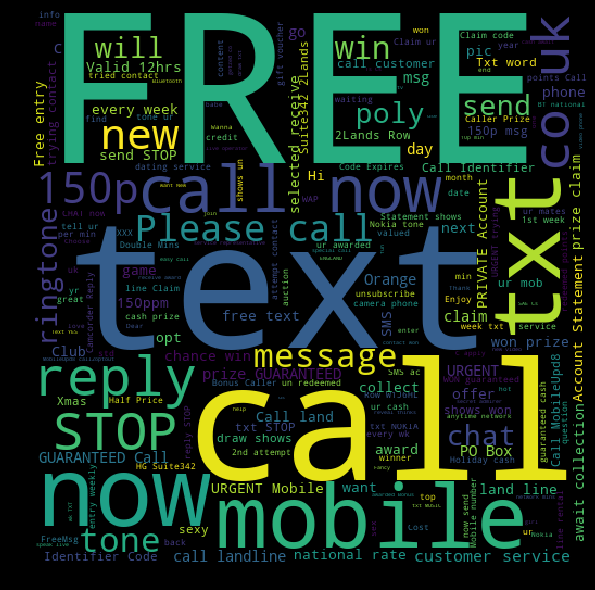

In [54]:
plt.figure(figsize = (10, 8), facecolor = 'k')  # it can be facecolor = 'r'
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Word Cloud for Non-spam words

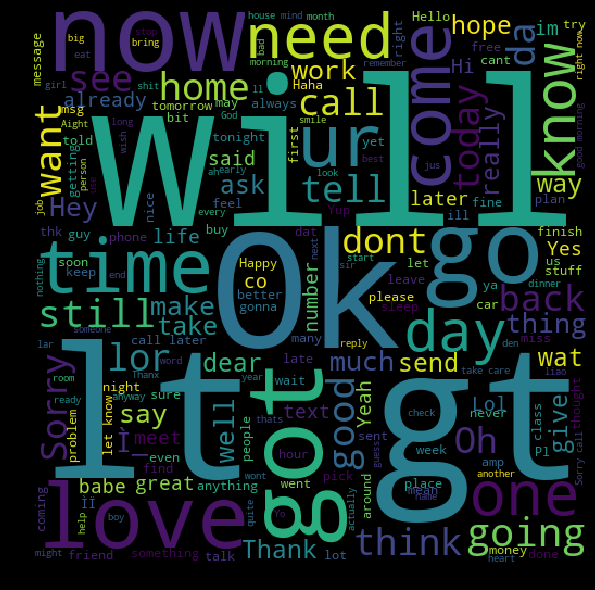

In [55]:
ham_words = ' '.join(list(df[df['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [56]:
trainData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,"Nah I don't think he goes to usf, he lives aro...",0
4,FreeMsg Hey there darling it's been 3 week's n...,1


In [57]:
trainData['label'].value_counts()

0    3622
1     549
Name: label, dtype: int64

In [58]:
testData.head()

,message,label
0,U dun say so early hor... U c already then say...,0
1,WINNER!! As a valued network customer you have...,1
2,I'm gonna be home soon and i don't want to tal...,0
3,"XXXMobileMovieClub: To use your credit, click ...",1
4,Fine if thatåÕs the way u feel. ThatåÕs the wa...,0


In [59]:
testData['label'].value_counts()

0    1203
1     198
Name: label, dtype: int64

In [64]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [65]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [66]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
        
        
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [69]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.9060402684563759
Recall:  0.6818181818181818
F-score:  0.7780979827089337
Accuracy:  0.9450392576730906


In [70]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.8934426229508197
Recall:  0.5505050505050505
F-score:  0.6812499999999999
Accuracy:  0.9271948608137045


In [71]:
pm = process_message('I cant pick the phone right now. Pls send a message')
sc_tf_idf.classify(pm)

False

In [72]:
pm = process_message('Congratulations ur awarded $500 ')
sc_tf_idf.classify(pm)

True

In [73]:
int(False),int(True)

(0, 1)